In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
valakhorasani_mobile_device_usage_and_user_behavior_dataset_path = kagglehub.dataset_download('valakhorasani/mobile-device-usage-and-user-behavior-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


# About this Dataset
This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [ ]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [ ]:
list_unique=df['Device Model'].unique()
for i in range(len(list_unique)):
    df['Device Model']=df['Device Model'].replace(list_unique[i],i)
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,Android,393,6.4,1872,67,1122,40,Male,4
1,2,1,Android,268,4.7,1331,42,944,47,Female,3
2,3,2,Android,154,4.0,761,32,322,42,Male,2
3,4,0,Android,239,4.8,1676,56,871,20,Male,3
4,5,3,iOS,187,4.3,1367,58,988,31,Female,3
5,6,0,Android,99,2.0,940,35,564,31,Male,2
6,7,4,Android,350,7.3,1802,66,1054,21,Female,4
7,8,1,Android,543,11.4,2956,82,1702,31,Male,5
8,9,4,Android,340,7.7,2138,75,1053,42,Female,4
9,10,3,iOS,424,6.6,1957,75,1301,42,Male,4


In [ ]:
df['Device Model'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df['Operating System']=df['Operating System'].map({'Android':1,'iOS':2})
df['Gender']=df['Gender'].map({'Male':1,'Female':2})
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,1,393,6.4,1872,67,1122,40,1,4
1,2,1,1,268,4.7,1331,42,944,47,2,3
2,3,2,1,154,4.0,761,32,322,42,1,2
3,4,0,1,239,4.8,1676,56,871,20,1,3
4,5,3,2,187,4.3,1367,58,988,31,2,3
5,6,0,1,99,2.0,940,35,564,31,1,2
6,7,4,1,350,7.3,1802,66,1054,21,2,4
7,8,1,1,543,11.4,2956,82,1702,31,1,5
8,9,4,1,340,7.7,2138,75,1053,42,2,4
9,10,3,2,424,6.6,1957,75,1301,42,1,4


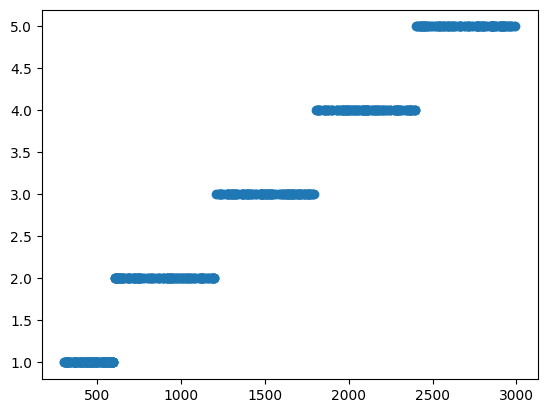

In [ ]:
plt.scatter(df['Battery Drain (mAh/day)'],df['User Behavior Class'])

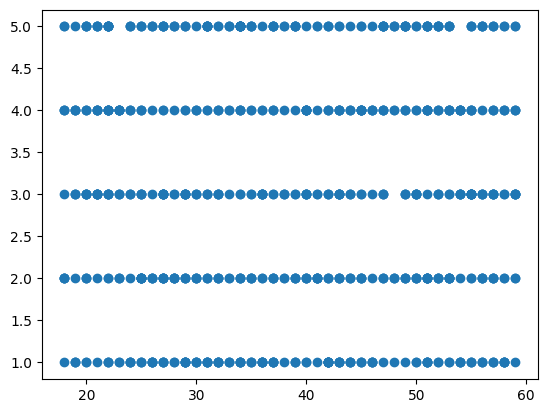

In [ ]:
plt.scatter(df['Age'],df['User Behavior Class'])

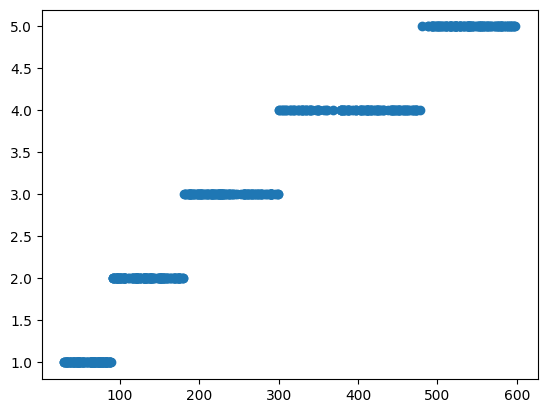

In [ ]:
plt.scatter(df['App Usage Time (min/day)'],df['User Behavior Class'])

In [1]:
sns.pairplot(df,hue='User Behavior Class')

NameError: name 'sns' is not defined

<Axes: >

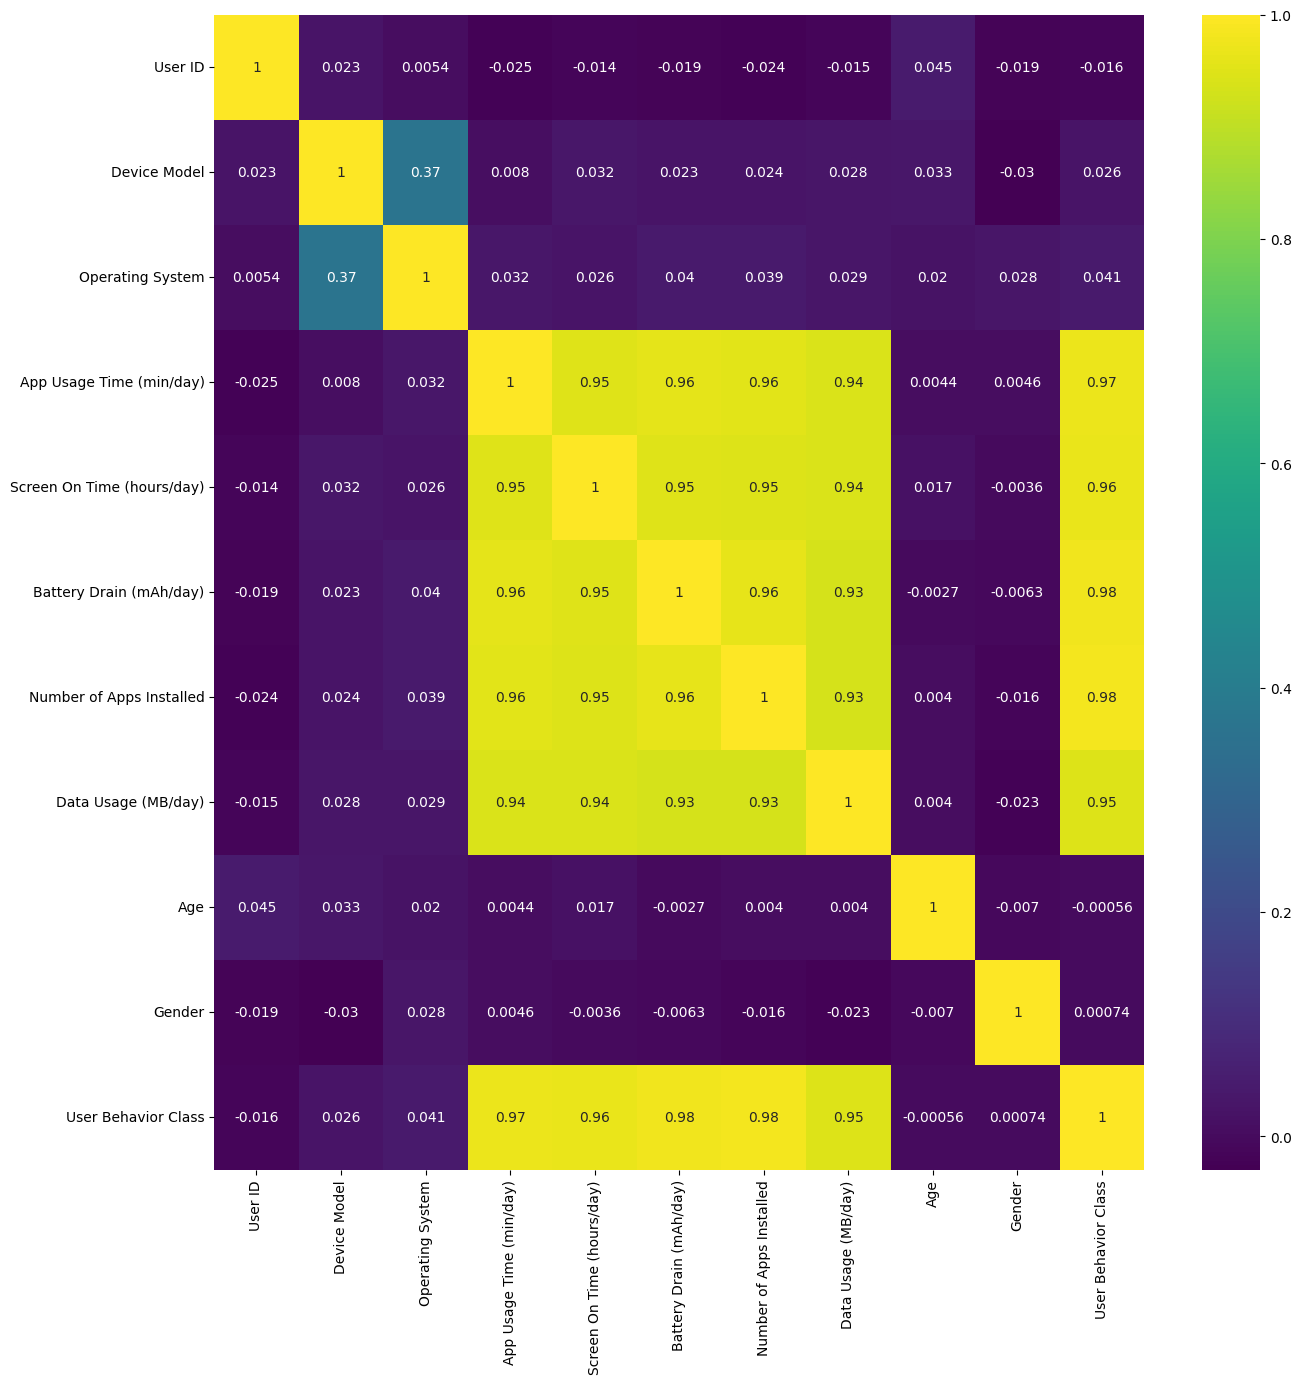

In [ ]:
Correlation_Matrix=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(Correlation_Matrix,annot=True,cmap='viridis')

In [ ]:
X=df.drop(['User ID','Device Model','Operating System','Age','Gender','User Behavior Class'],axis=1)
Y=df['User Behavior Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(len(x_train))
print(len(y_train))